In [39]:
import glob
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
from tqdm import tqdm
from numba import jit
import csv

In [9]:
dirs = glob.glob('./v*')

In [19]:
@jit
def psnr(image1, image2):
    mse = np.mean((image1.astype(np.float64) / 255 - image2.astype(np.float64) / 255) ** 2)
    if mse == 0.0:
        return False
    return (10 * np.log10(1. / mse))

@jit
def luma(image):
    return (0.299 * image[:, :, 2] + 0.587 * image[:, :, 1] + 0.114 * image[:, :, 0]).astype(np.uint8)

In [43]:
final = []
for x in dirs:
    f = open(f'{x}/psnr.csv', 'w')
    writer = csv.writer(f)
    writer.writerow(['video', 'PSNR'])
    
    subdirs = glob.glob(f'{x}/mounted_videos/*')

    for idx, y in enumerate(sorted(subdirs)):
        acc = 0
        original = cv.VideoCapture(f'{x}/original.mkv')
        compressed = cv.VideoCapture(y)
        videoCFrameCount = int(original.get(cv.CAP_PROP_FRAME_COUNT))
        
        totalFrames = videoCFrameCount
        
        for i in tqdm(range(0, videoCFrameCount, 1)):
            ok, oFrame = original.read()
            ok, cFrame = compressed.read()
            psnrvalue = psnr(luma(oFrame), luma(cFrame))
            if psnrvalue:
                acc += psnrvalue
            else:
                totalFrames -= 1

        meanPSNR = acc/totalFrames
        final.append(meanPSNR)
        writer.writerow([y, meanPSNR])


100%|█████████████████████████████████████████| 316/316 [00:18<00:00, 17.03it/s]


In [35]:
final

[35.009275547814845,
 34.051346660360345,
 33.02009696350912,
 31.937021064267093,
 30.76215519897213,
 29.43144170881392,
 27.88562899299047,
 26.169823843271974]

In [ ]:
[32.77808760351087,
 31.86794187912156,
 30.89115830025119,
 29.867838961698453,
 28.760363543274597,
 27.508401854685,
 26.056947617800528,
 24.448256786414937]

In [ ]:
data = [final[i] for i in range(0,8,1)]

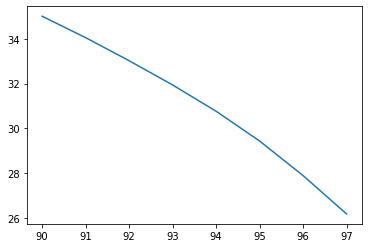

In [36]:
fig, ax = plt.subplots()
ax.plot(range(90,98,1), final)


In [ ]:
data